<p align=center><img src=https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png><p>

# <h1 align=center> **PROYECTO INDIVIDUAL Nº1** </h1>

# <h1 align=center>**`Exploratory Data Analysis`**</h1>

***Bienvenido al Análisis exploratiorio de datos realizado por Gerardo Cortijo***

*En éste notebook vamos a desarrollar un análisis exploratorio de datos para nuestros 3 datasets, comentando los cambios realizados en cada uno para la comprensión del usuario sobre lo modificado*


# Output_steam_games

Al abrir nuestro archivo *output_steam_games*, observamos que la cantidad de nulos representa más del 70% de nuestros datos totales, con lo cual procedimos a eliminar con (how='all') solo los nulos que en sus filas abarcan el total de columnas.


**Cantidad de nulos por columna**
publisher :      96362,
genres:          91593,
app_name:        88312,
title:           90360,
url:             88310,
release_date:    90377,
tags:            88473,
reviews_url:     88312,
specs:           88980,
price:           89687,
early_access:    88310,
id:              88312,
developer:       91609


Después de realizar ésta eliminación de nulos, renombramos las diferentes columnas que posee nuestro dataset df_steam_games para poder tenerlo más ordenado y verficamos de vuelta nuestra *cantidad de nulos*: 

publisher       8051,
genres          3282,
item_name          1,
title           2049,
url                0,
release_date    2066,
tags             162,
reviews_url        0,
specs            669,
price           1377,
early_access       0,
item_id            0,
developer       3298

Luego de revisar nulos y duplicados, encontramos datos faltantes en genres, pero encontramos similitud con la columna tags, la cual poseía géneros del juego observado, procedemos a realizar una funcion que tome como indice los valores unicos en géneros, para iterar por fila en tags y rellenar los valores faltantes en genres, luego procedimos a eliminar tags y eliminar datos en genres como "early_acces" o "free to play" ya que no son considerados generos


Extraemos el año de "release_Date" para dejar solo el año correspondiente a los juegos, y procedemos a eliminar todas las columnas innecesarias para nuestras funciones, el dataset *Steam_Games* quedaría asi: 

Nota: todas las columnas fueron debidamente transformadas al tipo de dato requerido para nuestro futuro modelado/función solicitada


## ***Df_steam_games columns: 'genres','item_name','release_date','item_id','developer'***

# Australian User reviews

Al abrir nuestro archivo *australian user reviews* observamos solo 3 columnas, las cuales son user_id, user_url y reviews, ésta ultima se encuentra anidada en listas, así que procedemos a desanidarla utilizando Explode


## ***user_id	,user_url	,funny	,posted	,last_edited	,item_id	,helpful	,recommend	,review,	0***

éstas son las columnas que nos quedan una vez desanidado reviews, procedemos a eliminar la columna "0", "helpful", "last_edited" y "funny" que son irrelevantes para nuestro análisis

Luego, rellenamos la columna "year" con la media para poder sacar los valores faltantes, ésta columna es relevante para nuestro analisis y modelado futuro de datos, por lo tanto utilizamos .median en year

## *Análisis de sentimiento*


Para nuestro análisis de sentimiento, utilizamos la libreria NLTK, la cual, con sentiment_vader, explora las reviews analizando el texto y devuelve valores como 0,1,2, en los cuales 2 es positivo, 1 es neutral(el cual tambien puede ser contemplado para usuarios que no dejaron reseña) y 0 para negativo, añadiendo la columna "sentiment_analysis" para nuestro dataset


Acá podemos observar la cantidad de sentimientos en el total de reviews, siendo más positivos que negativos y neutros

***sentiment_analysis***
***2 :   33524,***
***1  :  13062,***
***0   : 12747***

Seguido a lo realizado, procedemos a eliminar duplicados y nulos, que para nuestra grata sorpresa eran bastante pocos y pudimos continuar al siguiente dataset, obteniendo user_reviews de esta manera:
'user_id',	'user_url',	'item_id'	,'recommend',	'year',	'sentiment_analysis',

# ***Australian user items***


Al abrir nuestro dataset, nos encontramos con las siguientes columnas: 
'user_id'	'items_count'	'steam_id'	'user_url'	'items'

observamos que items está anidado, por lo cual procedemos a desanidarlo y concatenarlo con nuestro dataframe original df_items, nos quedaría asi: 

***'item_id'	'item_name'	'playtime_forever'	'playtime_2weeks'	'user_id'	'items_count'	'steam_id'	'user_url'***

procedemos a eliminar los nulos, con "how='all'", luego eliminamos las filas donde user_id o items_count son nulos, luego realizamos un codigo que borre los usuarios que tengan "items_count = 0" ya que no poseen juegos.

luego de eliminar duplicados y nulos, junto con columnas irrelevantes para nuestro análisis, nos quedaría un dataset así:
'item_id'	'item_name'	'playtime_forever'	'user_id'	'items_count'

## ACLARACIÓN IMPORTANTE:
Durante el proceso de ETL en los 3 datasets, podrán observar el uso de **Data Wrangler**, una extensión que nos facilita estos procesos

<img src="https://pbs.twimg.com/media/FLvYr91XEAAAX6f.jpg" width="250" height="150">

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [85]:
Steam_games = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/Steam_games.parquet')
user_reviews = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/user_reviews.parquet')
user_items = pd.read_parquet(r'D:/HENRY/ProyectoPIMLops/PIMLops-STEAM/user_items.parquet')

In [86]:
Steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28712 entries, 0 to 32130
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28712 non-null  object
 1   item_name     28712 non-null  string
 2   release_date  28712 non-null  int32 
 3   item_id       28712 non-null  int32 
 4   developer     28712 non-null  string
dtypes: int32(2), object(1), string(2)
memory usage: 1.1+ MB


In [87]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55314 entries, 137 to 13925
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             55314 non-null  string
 1   user_url            55314 non-null  string
 2   item_id             55314 non-null  int32 
 3   recommend           55314 non-null  bool  
 4   year                55314 non-null  int32 
 5   sentiment_analysis  55314 non-null  int64 
dtypes: bool(1), int32(2), int64(1), string(2)
memory usage: 2.2 MB


In [88]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71392 entries, 0 to 88308
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   item_id           71392 non-null  int32  
 1   item_name         71392 non-null  string 
 2   playtime_forever  71392 non-null  float64
 3   user_id           71392 non-null  object 
 4   items_count       71392 non-null  float64
dtypes: float64(2), int32(1), object(1), string(1)
memory usage: 3.0+ MB


### Realizamos 2 merge para obtener nuestros datos mas completos en cuanto a columnas para nuestras funciones


In [89]:
ReviewsxSteam = user_reviews.merge(Steam_games, on='item_id')

In [90]:
ReviewsxItems = user_reviews.merge(user_items, on='item_id')

Observamos reviewsxItems y ReviewsxSteam 

In [91]:
ReviewsxItems.head(2)

,user_id_x,user_url,item_id,recommend,year,sentiment_analysis,item_name,playtime_forever,user_id_y,items_count
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.1,76561197970982479,277.0
1,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.0,76561197991074667,14.0


In [92]:
ReviewsxSteam.head(2)

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve
1,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve


Procedemos a eliminar las columnas duplicadas 

In [93]:

def clean_data(ReviewsxItems):
    # borramos user id_x que devolvía valores erróneos
    ReviewsxItems = ReviewsxItems.drop(columns=['user_id_x'])
    # renombramos la columna "user_id_y" a "user_id"
    ReviewsxItems = ReviewsxItems.rename(columns={'user_id_y': 'user_id'})
    return ReviewsxItems

ReviewsxItems = clean_data(ReviewsxItems.copy())
ReviewsxItems

,user_url,item_id,recommend,year,sentiment_analysis,item_name,playtime_forever,user_id,items_count
0,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.100000,76561197970982479,277.0
1,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.000000,76561197991074667,14.0
2,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.000000,76561198060901683,234.0
3,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,1.550000,76561198011743390,385.0
4,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,1.800000,76561197967794920,36.0
...,...,...,...,...,...,...,...,...,...
8157405,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,You Have 10 Seconds 2,0.183333,76561198075070168,19.0
8157406,http://steamcommunity.com/profiles/76561198071...,521570,True,2014,1,You Have 10 Seconds 2,0.116667,shieldsey,101.0
8157407,http://steamcommunity.com/profiles/76561198071...,521570,True,2014,1,You Have 10 Seconds 2,0.000000,Cawwot,179.0
8157408,http://steamcommunity.com/profiles/76561198071...,521570,True,2014,1,You Have 10 Seconds 2,0.350000,76561198058867382,42.0


Eliminamos duplicados en user_id ya que habia usuarios que tenían reseñas duplicadas, obteniendo asi la reseña de cada usuario para juegos diferentes

eliminamos de nuestro merge los jugadores que no tengan horas de juego

In [95]:
ReviewsxItems = ReviewsxItems[ReviewsxItems['playtime_forever'] != 0]

revisamos el top reviewer, oséase, el usuario con más reseñas 

In [96]:
top_reviewer = ReviewsxItems['user_id'].value_counts().idxmax()
top_reviewer_reviews_conteo = ReviewsxItems['user_id'].value_counts().max()
print(f"El usuario con más reseñas es {top_reviewer} con {top_reviewer_reviews_conteo} reseñas.")

El usuario con más reseñas es blablabla174 con 3599 reseñas.


utilizamos este codigo para contar las reseñas repetidas, luego eliminamos los nulos basándonos en item_id, que no se repita por usuario

In [97]:
conteo_dupli = ReviewsxItems.duplicated(subset=['user_id', 'item_id']).sum()
print(f"Hay {conteo_dupli} reseñas repetidas.")

Hay 7541302 reseñas repetidas.


In [98]:
user_id = 'blablabla174'  # reemplaza esto con el ID del usuario que te interesa
user_recommend = ReviewsxItems[ReviewsxItems['user_id'] == user_id][['item_id', 'recommend']]


In [99]:
ReviewsxItems = ReviewsxItems.drop_duplicates(subset=['user_id', 'item_id'])

In [100]:
ReviewsxItems

,user_url,item_id,recommend,year,sentiment_analysis,item_name,playtime_forever,user_id,items_count
0,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,0.100000,76561197970982479,277.0
3,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,1.550000,76561198011743390,385.0
4,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,1.800000,76561197967794920,36.0
7,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,5.466667,MyCuntDotComDotAu,68.0
9,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Counter-Strike,9.666667,76561198019743758,90.0
...,...,...,...,...,...,...,...,...,...
8157395,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,True or False,0.050000,thextractx,205.0
8157396,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,True or False,0.083333,bocky120,36.0
8157402,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,You Have 10 Seconds 2,0.116667,shieldsey,101.0
8157404,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,You Have 10 Seconds 2,0.350000,76561198058867382,42.0


## Realizamos un gráfico de barras para observar los 3 juegos más recomendados para el año seleccionado


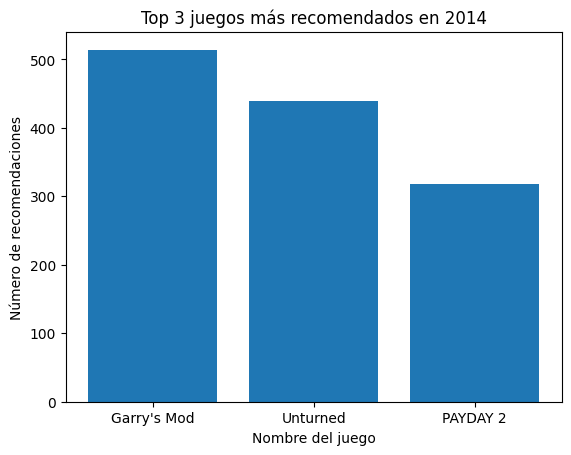

In [101]:
# Selecciona el año
año_select = 2014
# Filtra los datos para el año seleccionado y las recomendaciones positivas
df_filtrado = ReviewsxItems[(ReviewsxItems['year'] == año_select) & ((ReviewsxItems['recommend'] == True) | (ReviewsxItems['sentiment_analysis'] == 2))]
# Cuenta las recomendaciones para cada juego
recommend_count = df_filtrado['item_name'].value_counts()
# Selecciona los 3 juegos con más recomendaciones
top_3_games = recommend_count.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_games.index, top_3_games.values)
plt.title('Top 3 juegos más recomendados en ' + str(año_select))
plt.xlabel('Nombre del juego')
plt.ylabel('Número de recomendaciones')
plt.show()

eliminamos user_url

In [102]:
def clean_data(ReviewsxItems):
    # eliminamos user_url
    ReviewsxItems = ReviewsxItems.drop(columns=['user_url'])
    return ReviewsxItems
ReviewsxItems = clean_data(ReviewsxItems.copy())
ReviewsxItems.head(2)

,item_id,recommend,year,sentiment_analysis,item_name,playtime_forever,user_id,items_count
0,10,True,2014,1,Counter-Strike,0.10,76561197970982479,277.0
3,10,True,2014,1,Counter-Strike,1.55,76561198011743390,385.0


### Obtuvimos errores en 'genres' debido al merge que hicimos, vamos a corregirlo


In [103]:
# Realizamos conversion para item_id asi realizamos un merge preciso
ReviewsxItems['item_id'] = ReviewsxItems['item_id'].astype(int)
ReviewsxSteam['item_id'] = ReviewsxSteam['item_id'].astype(int)
# Realiza la fusión
Df_final = pd.merge(ReviewsxSteam, ReviewsxItems[['item_id', 'playtime_forever']], on='item_id', how='inner')

In [104]:
Df_final = Df_final.drop_duplicates(subset=['user_id', 'item_id'])
Df_final

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0.100000
88,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0.100000
176,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0.100000
264,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0.100000
352,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
6735802,dream2506,http://steamcommunity.com/id/dream2506,510050,True,2014,1,"Free to Play, Indie",You Have 10 Seconds,2016,tamationgames,0.500000
6735812,76561198009992783,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0.183333
6735817,76561198021048954,http://steamcommunity.com/profiles/76561198021...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0.183333
6735822,TfhuAWGscvg,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,"Casual, Free to Play, Indie",You Have 10 Seconds 2,2016,Tamationgames,0.116667


***Limpiamos nuestro merged dataframe final***

In [105]:
#Eliminamos los nulos que aparecieron en nuestro merge
def clean_data(Df_final):
    # eliminamos nulos de la columna user_id
    Df_final = Df_final.dropna(subset=['user_id'])
    return Df_final
Df_final = clean_data(Df_final.copy())
Df_final

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0.100000
88,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0.100000
176,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0.100000
264,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0.100000
352,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0.100000
...,...,...,...,...,...,...,...,...,...,...,...
6735802,dream2506,http://steamcommunity.com/id/dream2506,510050,True,2014,1,"Free to Play, Indie",You Have 10 Seconds,2016,tamationgames,0.500000
6735812,76561198009992783,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0.183333
6735817,76561198021048954,http://steamcommunity.com/profiles/76561198021...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0.183333
6735822,TfhuAWGscvg,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,"Casual, Free to Play, Indie",You Have 10 Seconds 2,2016,Tamationgames,0.116667


Convergemos todas las transformaciones necesarias en Df final para nuestro modelado luego, dejando los tipos de dato como deberían estar, para éste paso se unieron varias líneas de código en una funcion

In [106]:
def clean_data(Df_final):
    Df_final = Df_final.astype({'genres': 'string'})
    Df_final = Df_final.astype({'playtime_forever': 'int64'})
    Df_final = Df_final.astype({'sentiment_analysis': 'int64'})
    Df_final = Df_final.astype({'release_date': 'int64'})
    Df_final = Df_final.astype({'year': 'int64'})
    Df_final = Df_final.astype({'item_id': 'int64'})
    return Df_final

Df_final = clean_data(Df_final.copy())
Df_final.head()

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
88,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
176,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0
264,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0
352,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0


## Realizamos un gráfico para mostrar un top 3 de usuarios con más horas jugadas para el género y año seleccionados


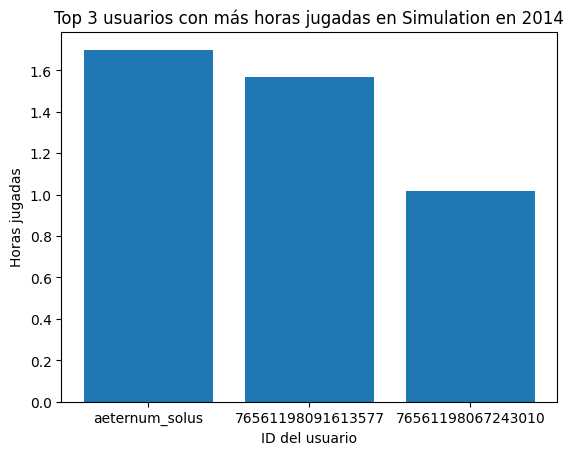

In [107]:

# Selecciona el género y el año
genero_select = 'Simulation'
año_select = 2014
# Filtra los datos para el género y el año seleccionados
df_filtered = Df_final[(Df_final['genres'] == genero_select) & (Df_final['year'] == año_select)]
# Suma las horas jugadas para cada usuario
suma_playtime = df_filtered.groupby('user_id')['playtime_forever'].sum() / 60
# Selecciona los 3 usuarios con más horas jugadas
top_3_users = suma_playtime.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_users.index, top_3_users.values)
plt.title('Top 3 usuarios con más horas jugadas en ' + genero_select + ' en ' + str(año_select))
plt.xlabel('ID del usuario')
plt.ylabel('Horas jugadas')
plt.show()

## Creamos otro gráfico, que nos permita visualizar los desarrolladores más criticados para el año seleccionado

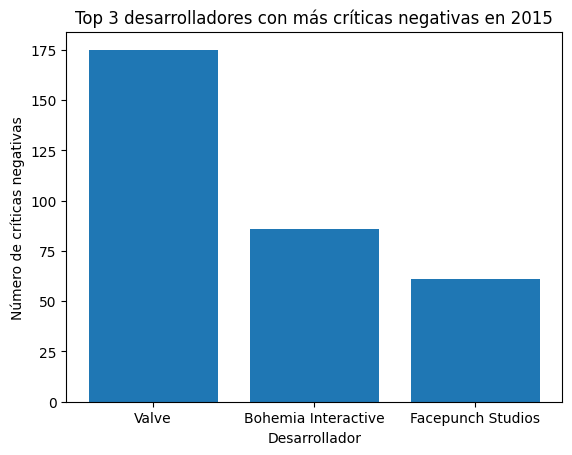

In [108]:
# Selecciona el año
year_selected = 2015
# Filtra los datos para el año seleccionado, las críticas negativas y los desarrolladores distintos de 'SinDato'
df_filtrado = ReviewsxSteam.loc[(ReviewsxSteam['year'] == year_selected) & (ReviewsxSteam['recommend'] == False) & (ReviewsxSteam['developer'] != 'SinDato')]
# Cuenta las críticas negativas para cada desarrollador
negative_reviews_count = df_filtrado['developer'].value_counts()
# Selecciona los 3 desarrolladores con más críticas negativas
top_3_peor_developer = negative_reviews_count.nlargest(3)
# Genera el gráfico de barras
plt.bar(top_3_peor_developer.index, top_3_peor_developer.values)
plt.title('Top 3 desarrolladores con más críticas negativas en ' + str(year_selected))
plt.xlabel('Desarrollador')
plt.ylabel('Número de críticas negativas')
plt.show()

## Generamos un gráfico para observar el análisis de sentimiento a lo largo de los años 

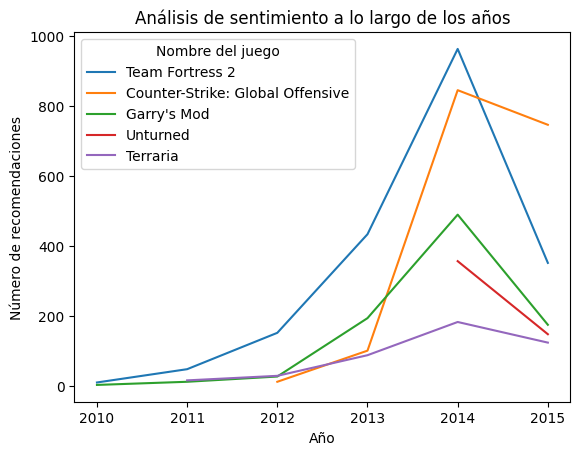

In [109]:
# Filtra los datos para las recomendaciones positivas
df_filtered = ReviewsxSteam[ReviewsxSteam['sentiment_analysis'] == 2]
# Cuenta las recomendaciones para cada juego y cada año
conteo_recommend = df_filtered.groupby(['item_name', 'year']).size()
# Selecciona los 10 juegos con más recomendaciones en total
top_10_juegos = conteo_recommend.groupby('item_name').sum().nlargest(5).index
# Filtra los datos para los 10 juegos con más recomendaciones
df_filtered_top_10 = conteo_recommend.loc[top_10_juegos]
# Genero el gráfico de líneas
df_filtered_top_10.unstack('item_name').plot(kind='line')
plt.title('Análisis de sentimiento a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(title='Nombre del juego')
plt.show()

## Generamos ésta vez, un gráfico de barras que nos muestre los 3 diferentes sentimientos acordes a la reseña del usuario, para poder realizar una mejor comparativa a nivel global de las reseñas

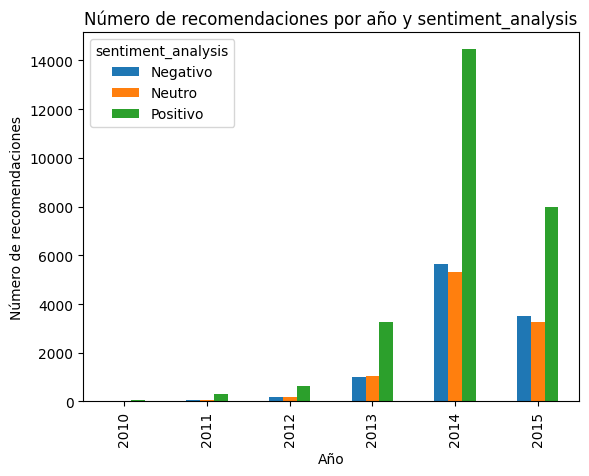

In [110]:
# Cuenta las recomendaciones para cada año y cada valor de 'sentiment_analysis'
conteo_recommend = ReviewsxSteam.groupby(['year', 'sentiment_analysis']).size()
# Genera el gráfico de barras
conteo_recommend.unstack('sentiment_analysis').plot(kind='bar', stacked=False)
plt.title('Número de recomendaciones por año y sentiment_analysis')
plt.xlabel('Año')
plt.ylabel('Número de recomendaciones')
plt.legend(['Negativo', 'Neutro', 'Positivo'], title='sentiment_analysis')
plt.show()

## Ahora vamos a realizar unos códigos de prueba para ver si nos devuelve lo solicitado:

In [111]:

def PlayTimeGenre(genero: str):
    # Filtra los datos para el género seleccionado en ReviewsxSteam
    df_filtered_steam = ReviewsxSteam[ReviewsxSteam['genres'] == genero]
    
    # Filtra los datos para los juegos seleccionados en ReviewsxItems
    df_filtered_items = ReviewsxItems[ReviewsxItems['item_id'].isin(df_filtered_steam['item_id'])]
    
    # Suma las horas jugadas para cada año
    playtime_sum = df_filtered_items.groupby('year')['playtime_forever'].sum() / 60
    
    if playtime_sum.empty:
        return {"Error": "No hay datos disponibles para el género " + genero}
    else:
        year_max_playtime = playtime_sum.idxmax()
        return {"Año de lanzamiento con más horas jugadas para " + genero : year_max_playtime}

# Puedes probar la función con:
print(type(PlayTimeGenre('Indie')))

<class 'dict'>


In [112]:
def UserForGenre(genero: str):
    # Filtra los datos para el género seleccionado en ReviewsxSteam
    df_filtered_steam = ReviewsxSteam[ReviewsxSteam['genres'] == genero]    
    # Filtra los datos para los juegos seleccionados en ReviewsxItems
    df_filtered_items = ReviewsxItems[ReviewsxItems['item_id'].isin(df_filtered_steam['item_id'])]
    # Suma las horas jugadas para cada usuario y cada año
    playtime_sum = df_filtered_items.groupby(['user_id', 'year'])['playtime_forever'].sum() / 60 
    # Encuentra el usuario con más horas jugadas
    user_max_playtime = playtime_sum.groupby('user_id').sum().idxmax()
    # Obtiene las horas jugadas por año para el usuario con más horas jugadas
    playtime_by_year = playtime_sum.loc[user_max_playtime].to_dict()
    return {"Usuario con más horas jugadas para " + genero : user_max_playtime, "Horas jugadas": playtime_by_year}
# Puedes probar la función con:
print(type(UserForGenre('Adventure')))

<class 'dict'>


In [113]:
def UsersRecommend(año: int):
    df_filtered = ReviewsxSteam[(ReviewsxSteam['year'] == año) & (ReviewsxSteam['recommend'] == True) & (ReviewsxSteam['sentiment_analysis'] >= 1)]
    recommend_count = df_filtered['item_name'].value_counts()
    top_3_games = recommend_count.nlargest(3).index.tolist()
    return [{"Puesto 1" : top_3_games[0]}, {"Puesto 2" : top_3_games[1]}, {"Puesto 3" : top_3_games[2]}]
print(type(UsersRecommend(2014)))

<class 'list'>


In [114]:

# Elimina las filas con 'SinDato' en la columna 'developer'
ReviewsxSteam = ReviewsxSteam.loc[ReviewsxSteam['developer'] != 'SinDato']

def UsersWorstDeveloper(año: int):
    df_filtered = ReviewsxSteam[(ReviewsxSteam['year'] == año) & (ReviewsxSteam['recommend'] == False) & (ReviewsxSteam['sentiment_analysis'] == 0)]
    negative_reviews_count = df_filtered['developer'].value_counts()
    top_3_bad_developers = negative_reviews_count.nlargest(3).index.tolist()
    return [{"Puesto 1" : top_3_bad_developers[0]}, {"Puesto 2" : top_3_bad_developers[1]}, {"Puesto 3" : top_3_bad_developers[2]}]

# Puedes probar la función con:
print(type(UsersWorstDeveloper(2014)))

<class 'list'>


In [115]:
def sentiment_analysis(developer: str):
    df_filtered = ReviewsxSteam[ReviewsxSteam['developer'] == developer]
    sentiment_count = df_filtered['sentiment_analysis'].value_counts().to_dict()
    return {developer : ['Negative = ' + str(sentiment_count.get(0, 0)), 'Neutral = ' + str(sentiment_count.get(1, 0)), 'Positive = ' + str(sentiment_count.get(2, 0))]}
print(type(sentiment_analysis('Ubisoft')))

<class 'dict'>


In [116]:
Df_final

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
88,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
176,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0
264,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0
352,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0
...,...,...,...,...,...,...,...,...,...,...,...
6735802,dream2506,http://steamcommunity.com/id/dream2506,510050,True,2014,1,"Free to Play, Indie",You Have 10 Seconds,2016,tamationgames,0
6735812,76561198009992783,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0
6735817,76561198021048954,http://steamcommunity.com/profiles/76561198021...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0
6735822,TfhuAWGscvg,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,"Casual, Free to Play, Indie",You Have 10 Seconds 2,2016,Tamationgames,0


In [117]:

def clean_data(Df_final):
    # Change column type to string for column: 'genres'
    Df_final = Df_final.astype({'genres': 'string'})
    return Df_final

Df_final = clean_data(Df_final.copy())
Df_final.head()

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
88,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
176,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0
264,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0
352,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0


In [118]:
Df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41825 entries, 0 to 6735825
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             41825 non-null  string
 1   user_url            41825 non-null  string
 2   item_id             41825 non-null  int64 
 3   recommend           41825 non-null  bool  
 4   year                41825 non-null  int64 
 5   sentiment_analysis  41825 non-null  int64 
 6   genres              41825 non-null  string
 7   item_name           41825 non-null  string
 8   release_date        41825 non-null  int64 
 9   developer           41825 non-null  string
 10  playtime_forever    41825 non-null  int64 
dtypes: bool(1), int64(5), string(5)
memory usage: 3.5 MB


In [119]:
ReviewsxItems

,item_id,recommend,year,sentiment_analysis,item_name,playtime_forever,user_id,items_count
0,10,True,2014,1,Counter-Strike,0.100000,76561197970982479,277.0
3,10,True,2014,1,Counter-Strike,1.550000,76561198011743390,385.0
4,10,True,2014,1,Counter-Strike,1.800000,76561197967794920,36.0
7,10,True,2014,1,Counter-Strike,5.466667,MyCuntDotComDotAu,68.0
9,10,True,2014,1,Counter-Strike,9.666667,76561198019743758,90.0
...,...,...,...,...,...,...,...,...
8157395,521340,True,2014,2,True or False,0.050000,thextractx,205.0
8157396,521340,True,2014,2,True or False,0.083333,bocky120,36.0
8157402,521570,True,2014,0,You Have 10 Seconds 2,0.116667,shieldsey,101.0
8157404,521570,True,2014,0,You Have 10 Seconds 2,0.350000,76561198058867382,42.0


In [120]:
Df_final = Df_final.reset_index(drop=True)

In [121]:
Df_final

,user_id,user_url,item_id,recommend,year,sentiment_analysis,genres,item_name,release_date,developer,playtime_forever
0,76561198089673598,http://steamcommunity.com/profiles/76561198089...,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
1,nottynotty,http://steamcommunity.com/id/nottynotty,10,True,2014,1,Action,Counter-Strike,2000,Valve,0
2,76561198134580826,http://steamcommunity.com/profiles/76561198134...,10,True,2014,2,Action,Counter-Strike,2000,Valve,0
3,mizi,http://steamcommunity.com/id/mizi,10,True,2015,1,Action,Counter-Strike,2000,Valve,0
4,Bennysaputra,http://steamcommunity.com/id/Bennysaputra,10,True,2015,0,Action,Counter-Strike,2000,Valve,0
...,...,...,...,...,...,...,...,...,...,...,...
41820,dream2506,http://steamcommunity.com/id/dream2506,510050,True,2014,1,"Free to Play, Indie",You Have 10 Seconds,2016,tamationgames,0
41821,76561198009992783,http://steamcommunity.com/profiles/76561198009...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0
41822,76561198021048954,http://steamcommunity.com/profiles/76561198021...,521340,True,2014,2,"Casual, Indie",True or False,2016,Vladimir Maslov,0
41823,TfhuAWGscvg,http://steamcommunity.com/id/TfhuAWGscvg,521570,True,2014,0,"Casual, Free to Play, Indie",You Have 10 Seconds 2,2016,Tamationgames,0


In [122]:
Df_final.to_parquet('DF_final.parquet')
ReviewsxItems.to_parquet('df_itemsR.parquet')
ReviewsxSteam.to_parquet('df_reviewsG.parquet')